For any questions, first read the DOCUMENTATION. Secondly have a look in the classes "DynamicExperimentClass.py" and "DynamicInvestigationClass.py". Last but not least, you can ask the author of this Code "Leonard Freisem" for further help.

The following code can be used for a comparison between two experiments. Plotting and saving of any other measurement data related treatment are the objectiv behind the code.
Follow the next steps to observe your Data.

Therefore, you will need Measurement Data and Noise Data.


In [10]:
from tracemalloc import stop
from turtle import color
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from collectAllMeasureDataInOneFile import*
import seaborn as sns
from DynamicExperimentClass import*
from DynamicInvestigationClass import*


Load two experiments to work with:

In [11]:
noiseBFieldPath = r'Z:\09-Data\00-Thesis\01_FalseStack_Ini\2025-06-18\VoltageControl\\'
filenamenoiseAV = "mesureBruitsEndSession5AlimOn.lvm"

bFieldPath = r'Z:\09-Data\00-Thesis\01_FalseStack_Ini\2025-06-18\VoltageControl\\'
filenameAV = "40A-CmdU-NoConnectors.lvm"                     ###!!!!!!!!-----------> Change here <-----------!!!!!!!!!!!!!!!!

measurementName = "Ref 40 A - No GasConnectors"
noiseName = "Noise 0 A"

refExperiment = DynamicExperiment(measurementName, bFieldPath, filenameAV, "lvm", noiseName, noiseBFieldPath, filenamenoiseAV, "lvm")

noiseBFieldPath = r'Z:\09-Data\00-Thesis\01_FalseStack_Ini\2025-06-18\VoltageControl\\'
filenamenoiseAV = "mesureBruitsEndSession5AlimOn.lvm"

bFieldPath = r'Z:\09-Data\00-Thesis\01_FalseStack_Ini\2025-06-18\VoltageControl\\'
filenameAV = "40A-CmdU-WithConnectors.lvm"                     ###!!!!!!!!-----------> Change here <-----------!!!!!!!!!!!!!!!!

measurementName = "40 A - with GasConnectors"
noiseName = "Noise 0A"

faultyExperiment = DynamicExperiment(measurementName, bFieldPath, filenameAV, "lvm", noiseName, noiseBFieldPath, filenamenoiseAV, "lvm")




Create Dynamic Investigation Class:

In [12]:
investigation = DynamicInvestigation(refExperiment, faultyExperiment)

Get information about the applied current for both test cases

In [13]:
print(investigation.get_Mean_current_Faulty_Measurement())
print(investigation.get_Mean_current_Healthy_Measurement())

20.151776627500002
20.95330282


In [14]:
investigation.get_tensions_Faulty()
print(list(investigation.faulty_voltages.keys()))


['AI16-Tension0', 'AI17-Tension1', 'AI18-Tension2', 'AI19-Tension3', 'AI19-Tension4', 'AI20-Tension5', 'AI4-Tension6', 'AI5-Tension7', 'AI6-Tension8', 'AI7-Tension9']


-0.4206927845


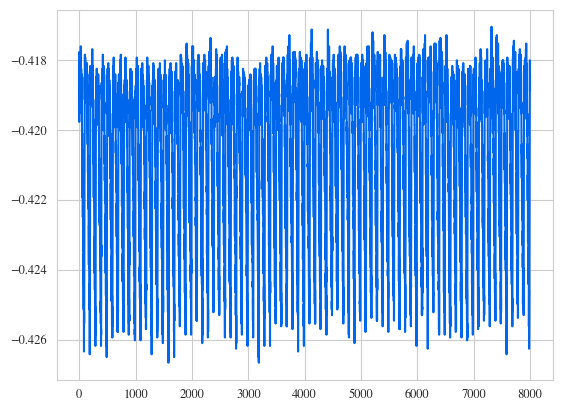

In [15]:
name = ['AI7-Tension9']
print(mean(investigation.faulty_voltages[name[0]]))
plt.plot(investigation.faulty_voltages[name[0]])

investigation.save_mean_faulty_Voltage_in_txt_in_V(name)
investigation.save_mean_faulty_current_in_txt_in_A()
        

Run these lines to obtain a list of Axial and Radial Sensors, you can work with:

In [16]:
print("Radial Sensors:")
print(refExperiment.dataMeasurement.get_all_Names_RadialSensors())
print("Axial Sensors:")
print(refExperiment.dataMeasurement.get_all_Names_AxialSensors())

Radial Sensors:
['S0133-Rad', 'S0234-Rad', 'S0335-Rad', 'S0436-Rad', 'S0537-Rad', 'S0638-Rad', 'S0739-Rad', 'S0840-Rad', 'S0941-Rad', 'S1042-Rad', 'S1143-Rad', 'S1244-Rad', 'S1345-Rad', 'S1446-Rad', 'S1547-Rad', 'S1648-Rad', 'S1749-Rad', 'S1850-Rad', 'S1951-Rad', 'S2052-Rad', 'S2153-Rad', 'S2254-Rad', 'S2355-Rad', 'S2456-Rad', 'S2557-Rad', 'S2658-Rad', 'S2759-Rad', 'S2860-Rad', 'S2961-Rad', 'S3062-Rad', 'S3163-Rad', 'S3264-Rad']
Axial Sensors:
['S0133-Ax', 'S0234-Ax', 'S0335-Ax', 'S0436-Ax', 'S0537-Ax', 'S0638-Ax', 'S0739-Ax', 'S0840-Ax', 'S0941-Ax', 'S1042-Ax', 'S1143-Ax', 'S1244-Ax', 'S1345-Ax', 'S1446-Ax', 'S1547-Ax', 'S1648-Ax', 'S1749-Ax', 'S1850-Ax', 'S1951-Ax', 'S2052-Ax', 'S2153-Ax', 'S2254-Ax', 'S2355-Ax', 'S2456-Ax', 'S2557-Ax', 'S2658-Ax', 'S2759-Ax', 'S2860-Ax', 'S2961-Ax', 'S3062-Ax', 'S3163-Ax', 'S3264-Ax']


Radial measurements:
Hear you can observe the sensor measurements over time.
Therefore we will split the Sensors in X-Pos, X-Neg, Y-Pos and Y-Neg (See technical Drawing)

In [17]:
Y_Neg = ['S0133-Rad', 'S0234-Rad', 'S0335-Rad', 'S0436-Rad', 'S0537-Rad']
X_Neg = ['S0638-Rad', 'S0739-Rad', 'S0840-Rad', 'S0941-Rad', 'S1042-Rad', 'S1143-Rad', 'S1244-Rad', 'S1345-Rad', 'S1446-Rad', 'S1547-Rad', 'S1648-Rad']
Y_Pos = ['S1749-Rad', 'S1850-Rad', 'S1951-Rad', 'S2052-Rad', 'S2153-Rad']
X_Pos = ['S2254-Rad', 'S2355-Rad', 'S2456-Rad', 'S2557-Rad', 'S2658-Rad', 'S2759-Rad', 'S2860-Rad', 'S2961-Rad', 'S3062-Rad', 'S3163-Rad', 'S3264-Rad']

sensors_of_Interest = refExperiment.dataMeasurement.get_all_Names_RadialSensors() + refExperiment.dataMeasurement.get_all_Names_AxialSensors()
# sensors_of_Interest = refExperiment.dataMeasurement.get_all_Names_RadialSensors() 

# sensors_of_Interest = Y_Neg + X_Neg + Y_Pos + X_Pos
# sensors_of_Interest = Y_Neg  + X_Neg


Set sensors of Interest in Investigation class:

In [18]:
investigation.set_sensors_Of_Interest(sensors_of_Interest)

In [19]:
healthyMean = investigation.compute_Healthy_sensors_mean_Values_with_Noise()

Now we can Plot the magnetic field on the chosen sensors

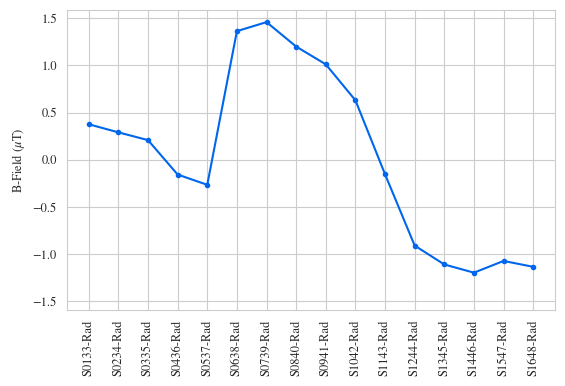

In [20]:
investigation.compute_Differential_Mean_valeus()


investigation.plot_differential_Field()


We can now scale the current to e.g. 20 A to have the same current for both experiments for later manipulations

In [21]:
investigation.scale_current_to_Current(20)
print(investigation.faultyExperiment.currentScaleFactor)

V0-Courant-I
S0133-Ax
S0234-Ax
S0335-Ax
S0436-Ax
S0537-Ax
S0638-Ax
S0739-Ax
S0840-Ax
S0941-Ax
S1042-Ax
S1143-Ax
S1244-Ax
S1345-Ax
S1446-Ax
S1547-Ax
S1648-Ax
S1749-Ax
S1850-Ax
S1951-Ax
S2052-Ax
S2153-Ax
S2254-Ax
S2355-Ax
S2456-Ax
S2557-Ax
S2658-Ax
S2759-Ax
S2860-Ax
S2961-Ax
S3062-Ax
S3163-Ax
S3264-Ax
S0133-Rad
S0133-Rad in list
-25.9706629375
-17.53725255
-8.433410387499997
S0234-Rad
S0234-Rad in list
-21.2776515
-16.661964037500002
-4.615687462499999
S0335-Rad
S0335-Rad in list
-16.3677718125
-14.958247150000002
-1.4095246624999973
S0436-Rad
S0436-Rad in list
-13.407534512499998
-16.3071370625
2.8996025500000027
S0537-Rad
S0537-Rad in list
-11.9916643125
-17.7063674125
5.714703100000001
S0638-Rad
S0638-Rad in list
-33.29828655000001
-7.2614518375
-26.036834712500006
S0739-Rad
S0739-Rad in list
-34.74290803750001
-6.821642062500001
-27.921265975000008
S0840-Rad
S0840-Rad in list
-32.607818025
-6.6581816625000005
-25.9496363625
S0941-Rad
S0941-Rad in list
-29.7997829125
-6.83384856249999

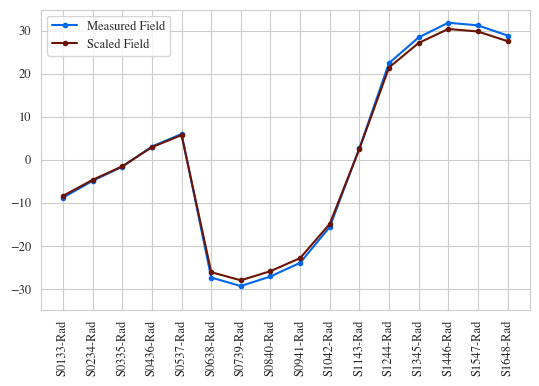

In [22]:
investigation.healthyExperiment.plot_scaled_and_initial_Field()

Plot Faulty and Healthy field

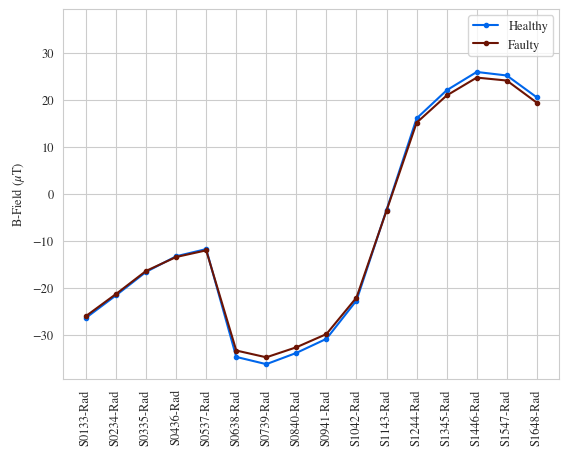

In [23]:
investigation.plot_Healthy_And_Faulty_Field()

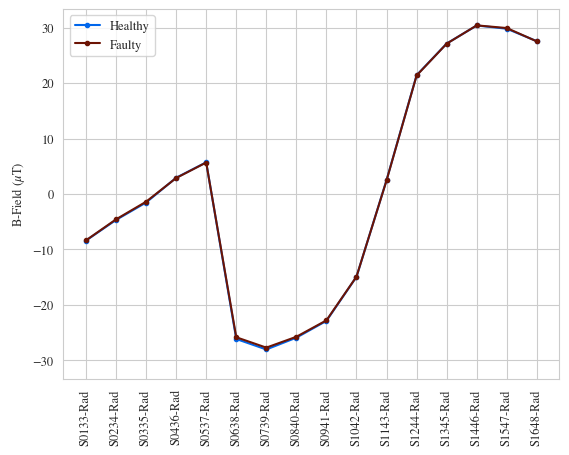

In [24]:
investigation.plot_Healthy_And_Faulty_Field_Scaled()

Now the difference between the two scaled fields can be computed and plotted:

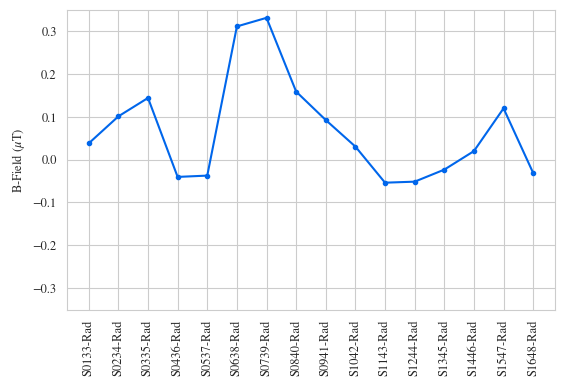

In [25]:
investigation.compute_Differential_Mean_valeus_with_scaled_Current()
investigation.plot_scaled_differential_field()

{'S0133-Rad': 0.18771972500000267, 'S0234-Rad': 0.1448438937499983, 'S0335-Rad': 0.10364297500000141, 'S0436-Rad': -0.0787642312499992, 'S0537-Rad': -0.1331505625, 'S0638-Rad': 0.6809808624999967, 'S0739-Rad': 0.728992624999993, 'S0840-Rad': 0.5994241437499994, 'S0941-Rad': 0.505268362499999, 'S1042-Rad': 0.3147111625000001, 'S1143-Rad': -0.0771874374999999, 'S1244-Rad': -0.4551407000000003, 'S1345-Rad': -0.5553020312499992, 'S1446-Rad': -0.598745837500001, 'S1547-Rad': -0.5367247812500011, 'S1648-Rad': -0.567674837500002}


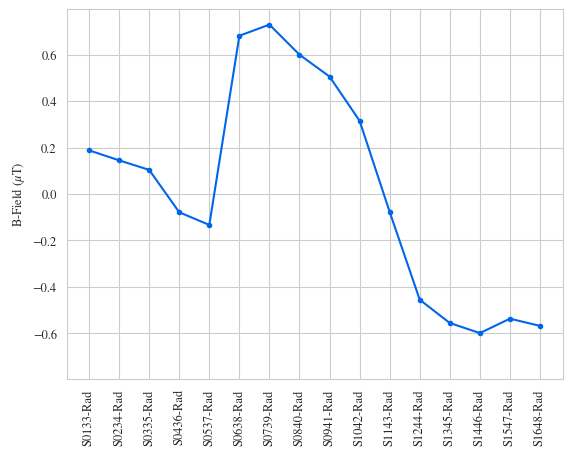

In [26]:
investigation.compute_Differential_Mean_valeus_with_Noise()
print(investigation.differential_Mean_Values_with_Noise)
investigation.plot_differential_Field_With_Noise()


Plot Sensor postitions for verification

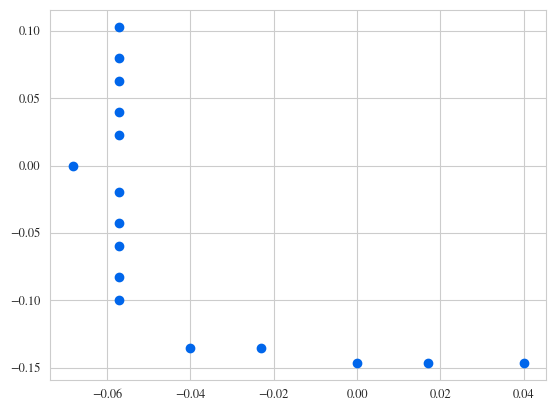

In [27]:
investigation.plot_Sensor_Positions_In_Space()


Now we can save the data to a file:

In [28]:
investigation.compute_Faulty_sensors_mean_Values_with_Noise()

{'S0133-Rad': -25.9706629375,
 'S0234-Rad': -21.2776515,
 'S0335-Rad': -16.3677718125,
 'S0436-Rad': -13.407534512499998,
 'S0537-Rad': -11.9916643125,
 'S0638-Rad': -33.29828655000001,
 'S0739-Rad': -34.74290803750001,
 'S0840-Rad': -32.607818025,
 'S0941-Rad': -29.7997829125,
 'S1042-Rad': -22.0357674375,
 'S1143-Rad': -3.525168225,
 'S1244-Rad': 15.164308499999999,
 'S1345-Rad': 20.9483220625,
 'S1446-Rad': 24.755595975,
 'S1547-Rad': 24.129734312500002,
 'S1648-Rad': 19.409674137499998}

In [29]:
investigation.save_in_txt_Field_in_T(faultyExperiment)
investigation.compute_Faulty_sensors_mean_Values_without_Noise()
plt.plot(investigation.sensorMeanValuesFaulty_without_Noise.values())

V0-Courant-I
S0133-Ax
S0234-Ax
S0335-Ax
S0436-Ax
S0537-Ax
S0638-Ax
S0739-Ax
S0840-Ax
S0941-Ax
S1042-Ax
S1143-Ax
S1244-Ax
S1345-Ax
S1446-Ax
S1547-Ax
S1648-Ax
S1749-Ax
S1850-Ax
S1951-Ax
S2052-Ax
S2153-Ax
S2254-Ax
S2355-Ax
S2456-Ax
S2557-Ax
S2658-Ax
S2759-Ax
S2860-Ax
S2961-Ax
S3062-Ax
S3163-Ax
S3264-Ax
S0133-Rad
S0133-Rad in list
-25.9706629375
-17.53725255
-8.433410387499997
S0234-Rad
S0234-Rad in list
-21.2776515
-16.661964037500002
-4.615687462499999
S0335-Rad
S0335-Rad in list
-16.3677718125
-14.958247150000002
-1.4095246624999973
S0436-Rad
S0436-Rad in list
-13.407534512499998
-16.3071370625
2.8996025500000027
S0537-Rad
S0537-Rad in list
-11.9916643125
-17.7063674125
5.714703100000001
S0638-Rad
S0638-Rad in list
-33.29828655000001
-7.2614518375
-26.036834712500006
S0739-Rad
S0739-Rad in list
-34.74290803750001
-6.821642062500001
-27.921265975000008
S0840-Rad
S0840-Rad in list
-32.607818025
-6.6581816625000005
-25.9496363625
S0941-Rad
S0941-Rad in list
-29.7997829125
-6.83384856249999

PermissionError: [Errno 13] Permission denied: 'Z:\\09-Data\\00-Thesis\\01_FalseStack_Ini\\2025-06-17\\\\SensorPositionsWithFieldsInT.txt'